In [10]:
# import packages
import numpy as np
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [30]:
# Path to the folder containing the chunked data
data_folder = "../data/"
output_folder = "../output/"

# Load data
triple_A_ECB = pd.read_csv(data_folder + "triple_A_ECB.csv",sep = ',')


In [31]:
triple_A_ECB

,Date,Beta0,Beta1,Beta2,Beta3,Tau1,Tau2
0,2023-06-21,1.118273,1.904365,3.782903,4.204132,0.709963,12.751263
1,2023-06-20,1.173580,1.931192,3.313523,3.942195,0.753719,12.633896
2,2023-06-19,1.193712,1.996922,2.953628,4.251043,0.777730,12.625607
3,2023-06-16,1.157355,1.961268,3.357803,4.208885,0.715551,12.298511
4,2023-06-15,1.197558,1.965299,3.062049,4.133540,0.704210,12.585513
...,...,...,...,...,...,...,...
4802,2004-09-10,5.355732,-3.395283,-0.375382,-0.507894,3.279876,1.479197
4803,2004-09-09,5.377333,-3.432592,-0.382208,-0.293482,3.271392,1.521143
4804,2004-09-08,5.385978,-3.447950,-0.346505,-0.198077,3.137857,1.553148
4805,2004-09-07,5.391886,-3.450353,-0.372908,-0.271295,3.157868,1.548566


In [32]:
# m = {1d, 1m, 3m, 6m, 9m, 1y, 1.5y, 2y, 3y, 4y, 5y, 6y, 7y, 8y, 9y, 10y, 15y, 20y} 
maturities = [1, 30, 90, 180, 270, 360, 540, 720, 1080, 1440, 1800, 2160, 2520, 2880, 3240, 3600, 5400, 7200]
maturities_yr = [x / 360 for x in maturities]

In [33]:
def NSS_ytm(maturities,beta0,beta1,beta2,beta3,tau1,tau2):
    output = pd.DataFrame()
    for m in maturities:
        output [str(m)] =  beta0 + beta1 * ((1-np.exp(-m/tau1))/(m/tau1)) + beta2 * ((1-np.exp(-m/tau1))/(m/tau1)-np.exp(-m/tau1)) +\
            beta3 * ((1-np.exp(-m/tau2))/(m/tau2)-np.exp(-m/tau2)) 
    return output

In [34]:
output_AAA = NSS_ytm(maturities_yr, triple_A_ECB['Beta0'], triple_A_ECB['Beta1'], triple_A_ECB['Beta2'], triple_A_ECB['Beta3'], triple_A_ECB['Tau1'], triple_A_ECB['Tau2'])

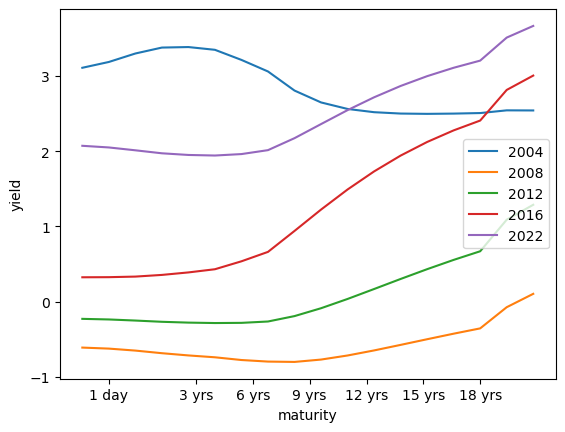

In [35]:
# Transpose dataframes and plot
AAA_transposed = output_AAA.transpose()

transposed_output = AAA_transposed.copy()
# Plot the vectors
plt.plot(transposed_output[1], label='2004')
plt.plot(transposed_output[1000], label='2008')
plt.plot(transposed_output[2000], label='2012')
plt.plot(transposed_output[3000], label='2016')
plt.plot(transposed_output[4600], label='2022')

# Add labels and legend
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend()

# Define custom x-axis tick locations and labels
tick = 15/7
custom_ticks = [1, tick*2, tick*3, tick*4, tick*5 ,tick*6, tick*7]
custom_tick_labels = ['1 day', '3 yrs', '6 yrs', '9 yrs', '12 yrs', '15 yrs', '18 yrs']
plt.xticks(custom_ticks, custom_tick_labels)

# Display the plot
plt.show()